# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Creating some data to view and fit

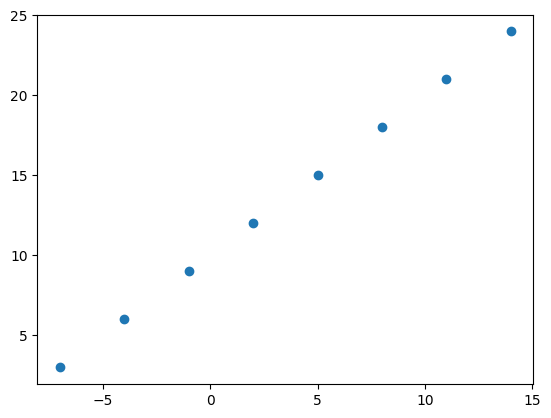

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# Relationship that have to learn our neural network
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performances of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 8.9628 - mae: 8.9628
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 8.8303 - mae: 8.8303
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 8.6978 - mae: 8.6978
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 8.5653 - mae: 8.5653
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 8.4328 - mae: 8.4328
